In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score


In [ ]:
# Set visual style
sns.set(style="whitegrid")

# Load dataset from downloaded file
df = pd.read_excel("/content/netflix_large_user_data.xlsx")  # Update filename and path as necessary

In [ ]:
# Inspect the dataset
print(df.head())
print(df.info())

  Customer ID  Subscription Length (Months)  \
0      C00001                            12   
1      C00002                            12   
2      C00003                             3   
3      C00004                             3   
4      C00005                            24   

   Customer Satisfaction Score (1-10)  Daily Watch Time (Hours)  \
0                                  10                      4.85   
1                                   8                      1.75   
2                                   4                      2.75   
3                                   7                      3.00   
4                                   2                      1.37   

   Engagement Rate (1-10) Device Used Most Often Genre Preference  \
0                       4                 Tablet           Action   
1                       9                 Laptop         Thriller   
2                       9               Smart TV           Comedy   
3                       9             

In [ ]:
# Data Cleaning: Remove spaces in column names if needed
df.columns = df.columns.str.replace(' ', '_')

# Handle missing values and invalid entries
print(df.isnull().sum())
df.dropna(inplace=True)

Customer_ID                           0
Subscription_Length_(Months)          0
Customer_Satisfaction_Score_(1-10)    0
Daily_Watch_Time_(Hours)              0
Engagement_Rate_(1-10)                0
Device_Used_Most_Often                0
Genre_Preference                      0
Region                                0
Payment_History_(On-Time/Delayed)     0
Subscription_Plan                     0
Churn_Status_(Yes/No)                 0
Support_Queries_Logged                0
Age                                   0
Monthly_Income_($)                    0
Promotional_Offers_Used               0
Number_of_Profiles_Created            0
dtype: int64


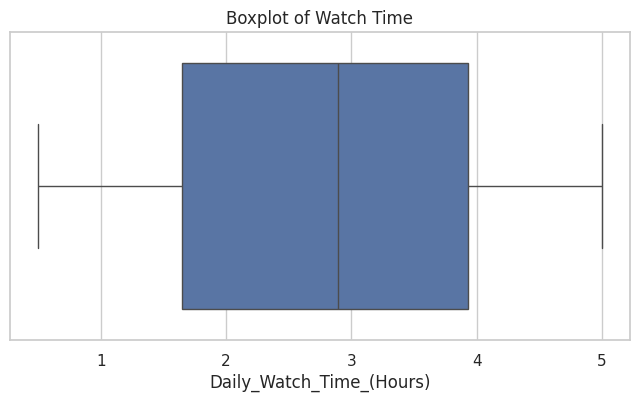

In [ ]:
# Example outlier detection: Watch_Time feature
if 'Daily_Watch_Time_(Hours)' in df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df['Daily_Watch_Time_(Hours)'])
    plt.title("Boxplot of Watch Time")
    plt.show()

In [ ]:
# Feature Engineering: Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

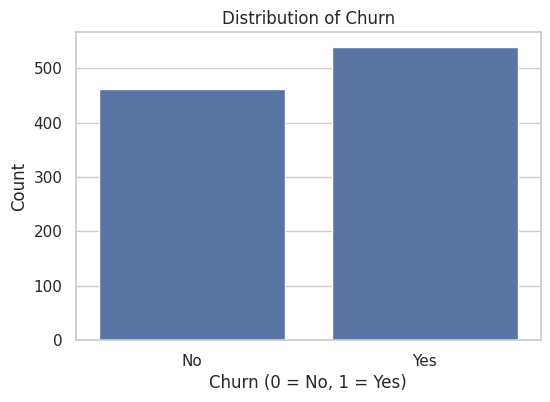

In [ ]:
# Visualizations: Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn_Status_(Yes/No)', data=df)
plt.title("Distribution of Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

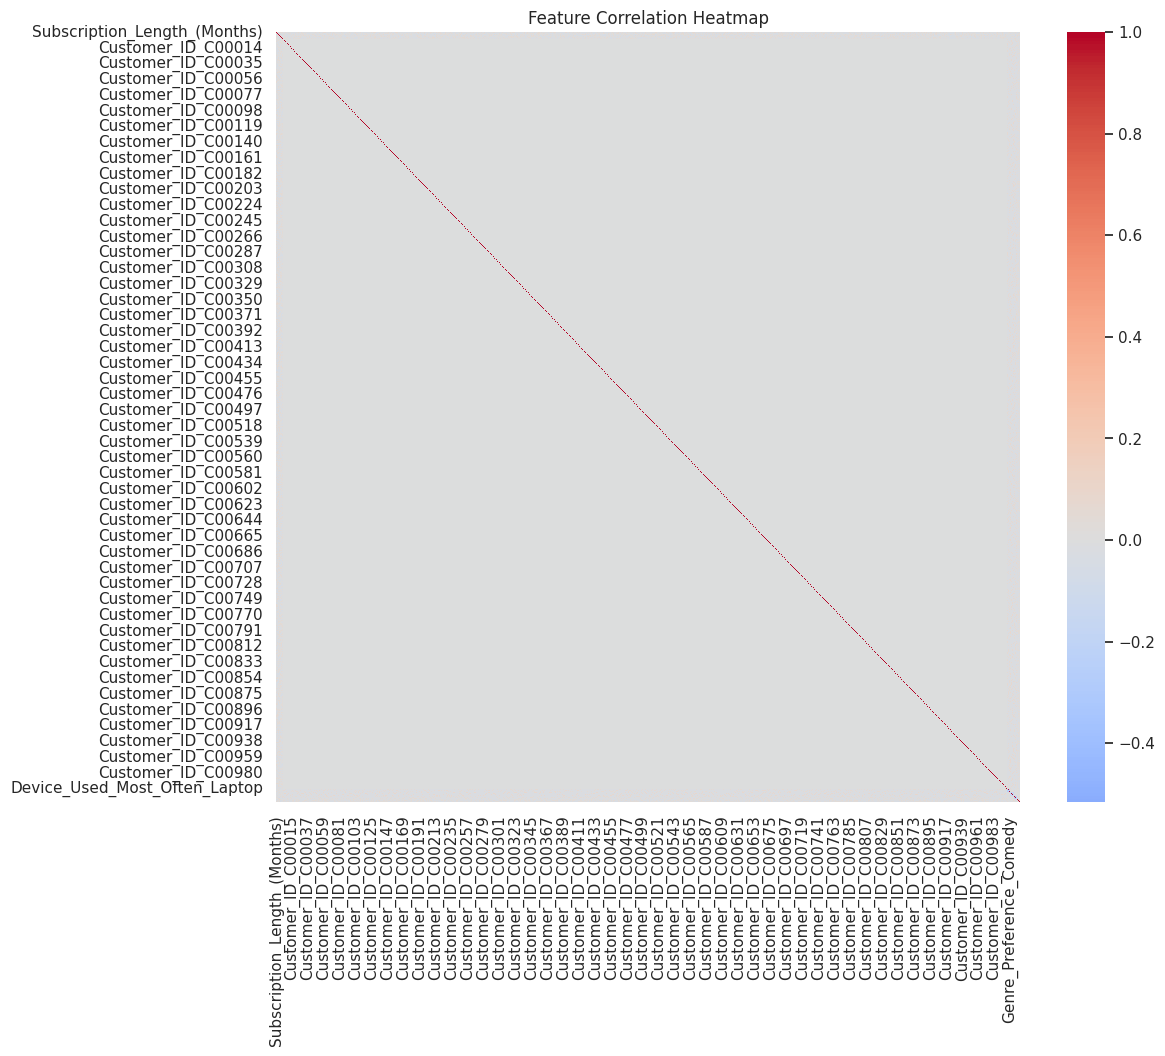

In [ ]:

# Visualizations: Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Prepare features and target
X = df_encoded.drop('Churn_Status_(Yes/No)_Yes', axis=1)
y = df_encoded['Churn_Status_(Yes/No)_Yes']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
# Define multiple classifiers
log_reg = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [ ]:
# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', log_reg),
    ('rf', random_forest),
    ('gb', gb_clf)
], voting='soft')

In [ ]:
# Fit and evaluate all models
for model, label in zip([log_reg, random_forest, gb_clf, voting_clf],
                        ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Voting Ensemble']):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    print(f"\n{label} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"{label} ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.50      0.41      0.45       138
        True       0.56      0.64      0.60       162

    accuracy                           0.54       300
   macro avg       0.53      0.53      0.53       300
weighted avg       0.53      0.54      0.53       300

Logistic Regression ROC AUC Score: 0.5104222580067991

Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.53      0.34      0.41       138
        True       0.57      0.74      0.64       162

    accuracy                           0.56       300
   macro avg       0.55      0.54      0.53       300
weighted avg       0.55      0.56      0.54       300

Random Forest ROC AUC Score: 0.5331454643048846

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

       False       0.49      0.30      0.37       138
        

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Voting Ensemble Classification Report:
               precision    recall  f1-score   support

       False       0.46      0.28      0.35       138
        True       0.54      0.73      0.62       162

    accuracy                           0.52       300
   macro avg       0.50      0.50      0.48       300
weighted avg       0.51      0.52      0.49       300

Voting Ensemble ROC AUC Score: 0.5318930041152263


In [ ]:
# Evaluation Rationale and Summary Comment:
# - ROC AUC Score was chosen as the primary evaluation metric because it measures model performance across all classification thresholds,
#   especially important for imbalanced datasets like churn prediction where accuracy alone may be misleading.
# - Classification reports (precision, recall, f1-score) were also included to provide insight into how models handle false positives and false negatives.
# - Logistic Regression, Random Forest, Gradient Boosting, and a Voting Classifier Ensemble were used to demonstrate a baseline as well as more complex ensemble methods.
# - None of the models achieved strong ROC AUC scores, indicating opportunities for further feature engineering, class balancing, or model tuning.

# Summary comment:
# - Dataset changed to Netflix customer churn and engagement data.
# - Data cleaning involved handling missing values and converting categorical variables.
# - Feature engineering included encoding categorical columns using get_dummies.
# - Class imbalance is noted and could be handled with sampling techniques in future iterations.
# - Multiple models were evaluated, including Logistic Regression, Random Forest, Gradient Boosting, and a Voting Classifier Ensemble.
# - Performance metrics were compared using classification report and ROC AUC score for each model.